In [4]:
import pandas as pd
import sys
sys.path.insert(0, "../..")
from utils.simulation import BacktestSimulation, TradingAction
from strategies.leap_strategy import create_leap_strategy
from datetime import datetime, timedelta

# Configuration
ticker = "SCHG"
strike_factor = 1
interest_rate = 0.05
days = 365
time = days / 365 

tickers = [ticker]
start = datetime(2024, 1, 1)
end = datetime(2024, 12, 31)
initial_cash = 10000

Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

LEAP STRATEGY PERFORMANCE

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $59,773.93
Total Return: 497.74%
Sharpe Ratio: 2.19
Max Drawdown: 46.92%
Annualized Volatility: 108.48%

Total transactions: 3

Transaction History:
        date      action ticker  contracts     strike  premium_per_share  total_premium expiration
0 2024-01-02    BUY_CALL   SCHG         69  20.280062           1.448633    9995.567356 2025-01-01
1 2024-10-04  CLOSE_CALL   SCHG         69  20.280062           5.878347   40560.594085 2025-01-01
2 2024-10-04    BUY_CALL   SCHG        164  25.911804           2.472913   40555.775008 2025-10-04


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


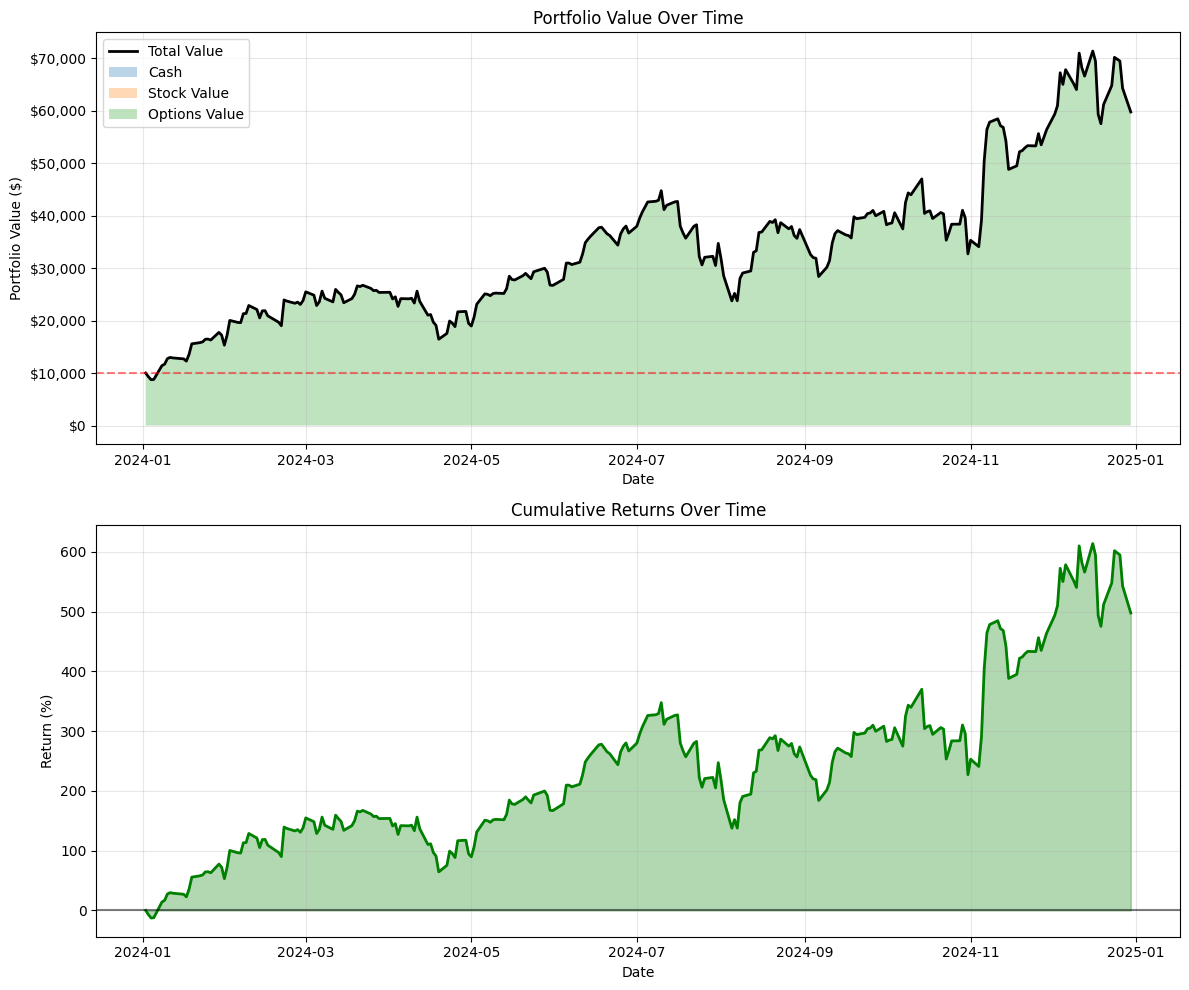

In [5]:
leap_strategy = create_leap_strategy(ticker, strike_factor, days, interest_rate)

# Run LEAP strategy simulation
sim_leap = BacktestSimulation(
    tickers=tickers,
    start_date=start,
    end_date=end,
    initial_cash=initial_cash,
    strategy_callback=leap_strategy
)

results_leap = sim_leap.run()

print("\n" + "="*50)
print("LEAP STRATEGY PERFORMANCE")
print("="*50)
sim_leap.print_performance_stats()

transactions_leap = sim_leap.get_transactions()
print(f"\nTotal transactions: {len(transactions_leap)}")
print("\nTransaction History:")
print(transactions_leap.to_string())

sim_leap.plot_portfolio_history()

Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

BUY AND HOLD STRATEGY PERFORMANCE

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $13,834.16
Total Return: 38.34%
Sharpe Ratio: 1.95
Max Drawdown: 12.36%
Annualized Volatility: 17.58%

Total transactions: 1


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


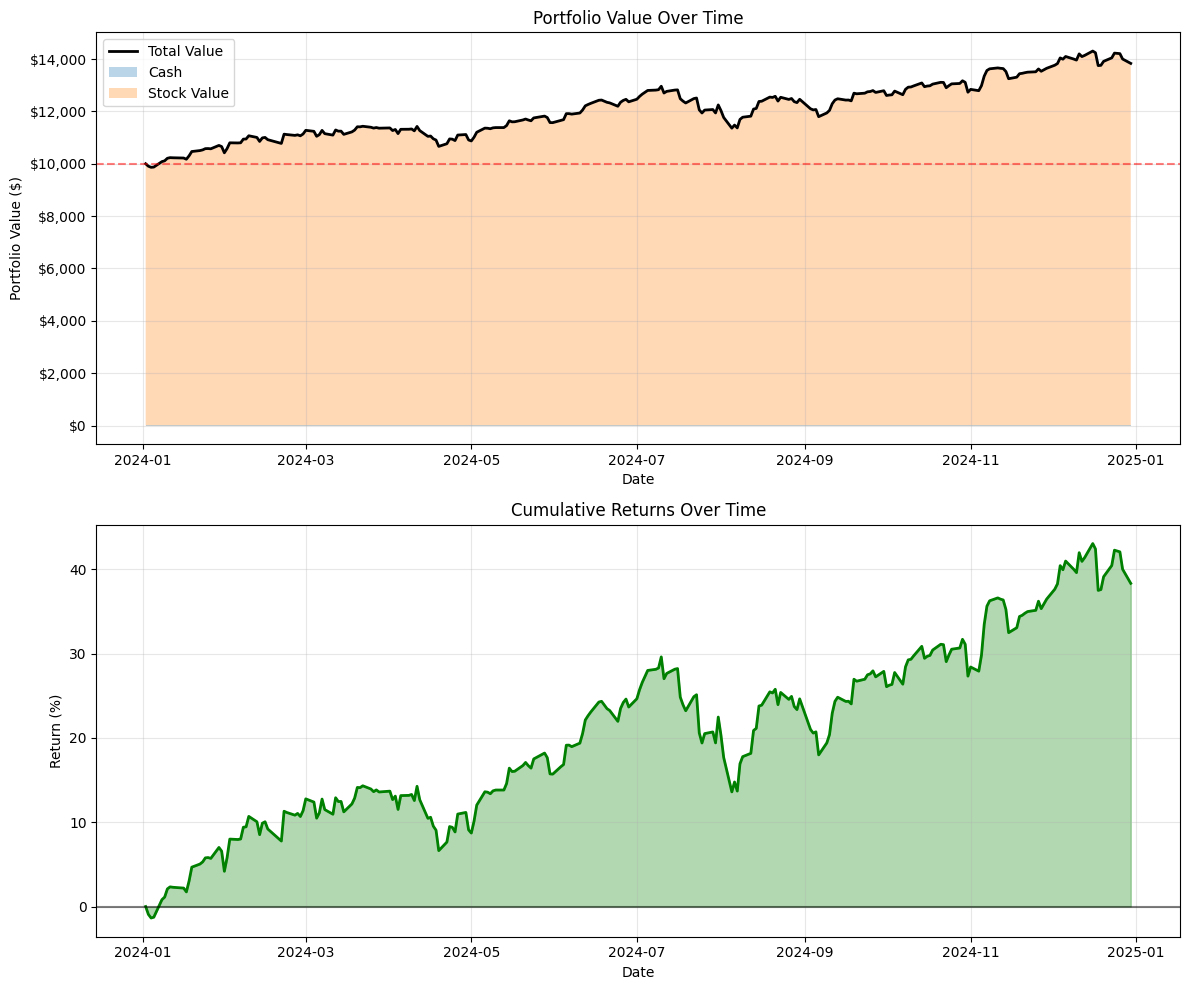

In [6]:
# Compare with Buy and Hold strategy
def buy_and_hold(date, portfolio, market_data, actions):
    """Simple buy and hold strategy for comparison"""
    current_price = market_data['prices'][ticker]
    
    # Buy stock with all available cash on first day
    if ticker not in portfolio.positions or portfolio.positions[ticker].shares == 0:
        max_shares = int(portfolio.cash / current_price)
        if max_shares > 0:
            actions.buy_stock(portfolio, ticker, max_shares, current_price)

# Run buy and hold simulation
sim_bh = BacktestSimulation(
    tickers=tickers,
    start_date=start,
    end_date=end,
    initial_cash=initial_cash,
    strategy_callback=buy_and_hold
)

results_bh = sim_bh.run()

print("\n" + "="*50)
print("BUY AND HOLD STRATEGY PERFORMANCE")
print("="*50)
sim_bh.print_performance_stats()

transactions_bh = sim_bh.get_transactions()
print(f"\nTotal transactions: {len(transactions_bh)}")

sim_bh.plot_portfolio_history()

In [8]:
tickers = ["GOOG", "MSFT", ""]
strike_factors = [0.8, 1, 1.2]
interest_rate = 0.05
days = 365


for strike_factor in strike_factors:
            time = days/365
            tickers = [ticker]
            start = datetime(2024, 1, 1)
            end = datetime(2024, 12, 31)
            initial_cash = 10000
            # Run LEAP strategy simulation
            sim_leap = BacktestSimulation(
                tickers=tickers,
                start_date=start,
                end_date=end,
                initial_cash=initial_cash,
                strategy_callback=leap_strategy
            )

            results_leap = sim_leap.run()

            print("\n" + "="*50)
            print("LEAP STRATEGY PERFORMANCE")
            print("="*50)
            print("params:")
            print("strike_factor:", strike_factor)
            print("interest_rate:", interest_rate)
            print("days:", days)
            sim_leap.print_performance_stats()


Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

LEAP STRATEGY PERFORMANCE
params:
strike_factor: 0.8
interest_rate: 0.05
days: 365

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $59,773.93
Total Return: 497.74%
Sharpe Ratio: 2.19
Max Drawdown: 46.92%
Annualized Volatility: 108.48%
Loading market data...
Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

LEAP STRATEGY PERFORMANCE
params:
strike_factor: 1
interest_rate: 0.05
days: 365

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $59,773.93
Total Return: 497.74%
Sharpe Ratio: 2.19
Max Drawdown: 46.92%
Annualized Volatility: 108.48%
Loading market data...


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)
/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)


Running simulation from 2024-01-02 to 2024-12-30
Total trading days: 251

LEAP STRATEGY PERFORMANCE
params:
strike_factor: 1.2
interest_rate: 0.05
days: 365

=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $59,773.93
Total Return: 497.74%
Sharpe Ratio: 2.19
Max Drawdown: 46.92%
Annualized Volatility: 108.48%
